![example](images/director_shot.jpeg)

# House Sales In NorthWestern Country

**Authors:** Vince Scacco
***

## Overview

Houses have changed overtime, and so have the prices. King's County have a set of terminology that they use to distinguish houses by their features. It's important to understand what gives a house it's value- and how influential that can be to either buying or selling a house. 

## Business Problem

This study aims to see which code we can use and what features are important to house prices. 
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
df_kchouse = pd.read_csv('kc_house_data.csv')



In [3]:
df_kchouse=pd.read_csv('kc_house_data.csv')
df_kchouse.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Just seeing what the data roughly looks like, deciding if I need to clean it 

In [4]:
df_kchouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
#I don't see a need to clean this data here, no null values seeem to be present

In [6]:
print(df_kchouse.describe())


                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825    

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
* columns were dropped to condense data 
* data is briefly visualised to see any trends
***

In [7]:
columns_to_remove = ['id','date', 'view', 'sqft_above', 'sqft_basement', 
                     'yr_renovated', 'zipcode', 'lat', 'long', 
                     'sqft_living15', 'sqft_lot15', 'waterfront']


In [8]:
df_kchouse.drop(columns=columns_to_remove, inplace=True)
print(df_kchouse.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0  221900.0         3       1.00         1180      5650     1.0          3   
1  538000.0         3       2.25         2570      7242     2.0          3   
2  180000.0         2       1.00          770     10000     1.0          3   
3  604000.0         4       3.00         1960      5000     1.0          5   
4  510000.0         3       2.00         1680      8080     1.0          3   

   grade  yr_built  
0      7      1955  
1      7      1951  
2      6      1933  
3      7      1965  
4      8      1987  


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'yr_built'}>]], dtype=object)

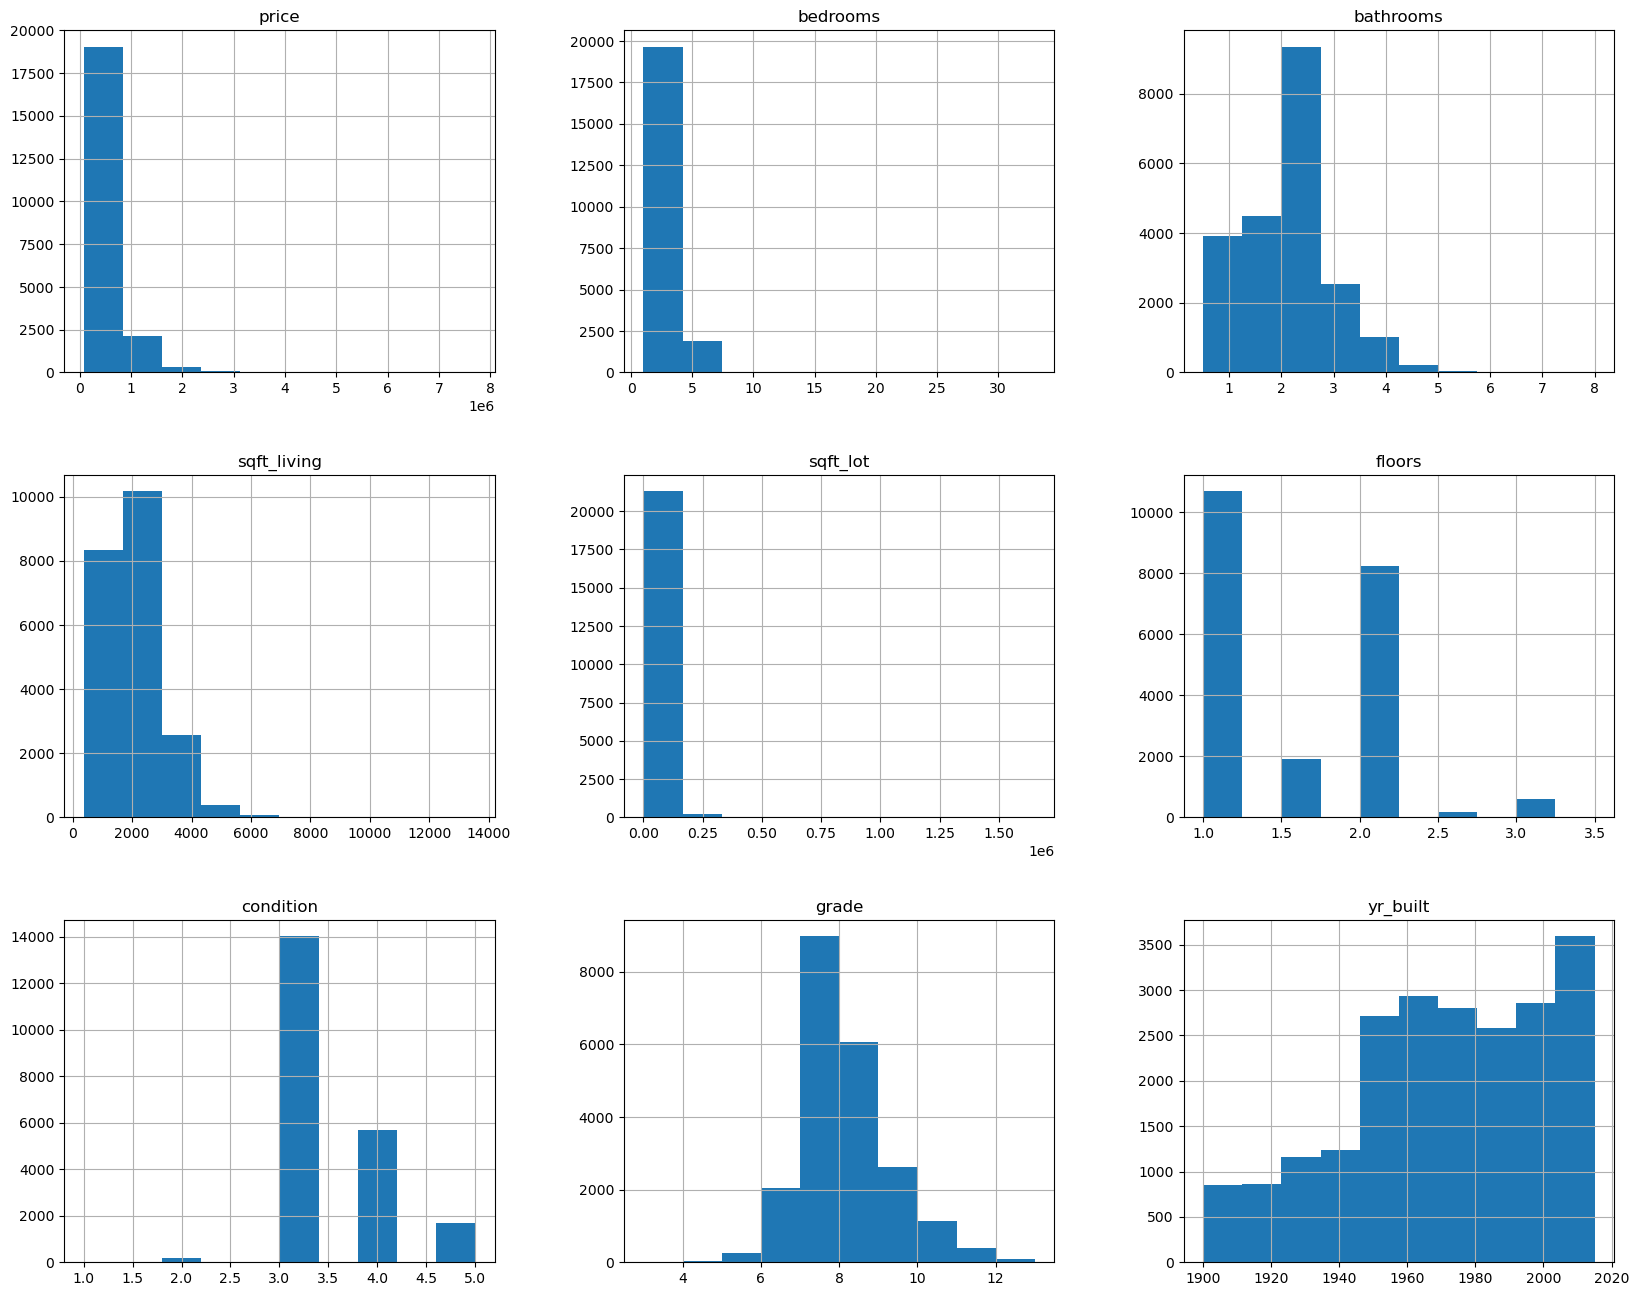

In [9]:
df_kchouse.hist(figsize=(20,16))

In [ ]:
# I can see trends present, particularily in the year built. I will proceed to verify trends. 

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Which features affect price the most?

Training MSE: 61856525489.76321
Test MSE: 67077736673.71412


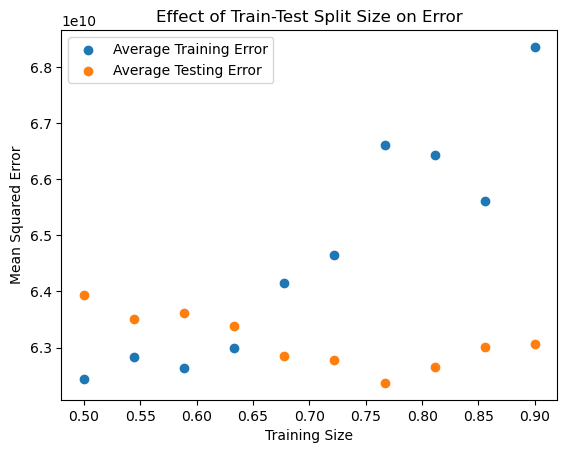

In [20]:
#Labelling data for a train-test split. 
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built']
categoricals = []  

#Train-Test Split
X = df_kchouse.drop(columns=['price']) #this is important as I'll be comparing results to price
y = df_kchouse['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Transforming the data
log_transformer.fit(X_train[continuous])

X_train = pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index)
X_test = pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index)

#Linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Calculate the Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Evaluate the Effect of Train-Test Split Size
train_mses = []
test_mses = []
t_sizes = np.linspace(0.5, 0.9, 10)

for t_size in t_sizes:
    inner_train_mses = []
    inner_test_mses = []
    for i in range(10):
        # Create new split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=i)
        
        log_transformer.fit(X_train[continuous])

        X_train_transformed = pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index)

        X_test_transformed = pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index)

        linreg.fit(X_train_transformed, y_train)

        y_hat_train = linreg.predict(X_train_transformed)
        y_hat_test = linreg.predict(X_test_transformed)
        inner_train_mses.append(mean_squared_error(y_train, y_hat_train))
        inner_test_mses.append(mean_squared_error(y_test, y_hat_test))

    train_mses.append(np.mean(inner_train_mses))
    test_mses.append(np.mean(inner_test_mses))

fig, ax = plt.subplots()
ax.scatter(t_sizes, train_mses, label='Average Training Error')
ax.scatter(t_sizes, test_mses, label='Average Testing Error')
ax.legend()
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Train-Test Split Size on Error')
plt.show()

In [23]:
#You can see that in the effect of train-test split size on error graph that there is a trend, however it is underfitting due to erros with the data


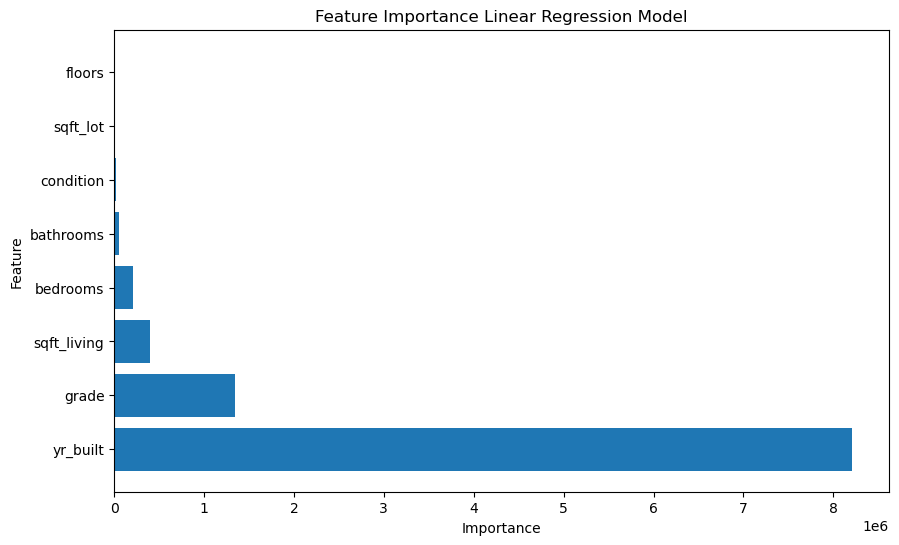

In [22]:
#this next step will evaluate the data 
abs_coefficients = np.abs(coefficients)

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs_coefficients
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Linear Regression Model')
plt.show()

## Evaluation

Using what we have learned from the course, we can see that the year a house is built, along with it's grade and size are notably the most important features that drive house price. 

We'll note from the "Effect of Train-test Split Size on Error" had an underfitting interpretation, which is to suggest that a more complex model should be used on this data. 

It can then be recommended to clients that they should consider these features when evaluating a house price and take into consideration that the newer the house, the higher the price. 

## Conclusions

Businesses should take into consideration the top three factors based on this analysis for setting a house price; the year built, grade and size of the home. 

The code used was too simple to pick up on the trends of the data, which is shown from the "Effect of Train-test Split Size on Error". I've done some research into what I could have used- however I stuck to the code used in the labs provided. 

Overall this data has some conclusive results that can lead more research into which features are important to driving house prices. 
***